In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM,Bidirectional

Using TensorFlow backend.
C:\Users\snair\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\snair\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\snair\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [2]:
train_dataset=pd.read_csv('Google_Stock_Price_Train.csv')
train_data=train_dataset.iloc[:,1:2].values #converting to array

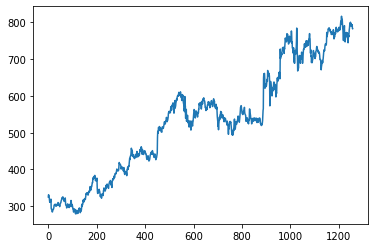

In [3]:
plt.plot(train_data)

# Scaling the data

In [4]:
sc=MinMaxScaler()
train_data=sc.fit_transform(train_data)

# Taking the window size as 60 days


In [5]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i])
    
x_train=np.array(x_train)
y_train=np.array(y_train)

In [6]:
x_train.shape

(1198, 60)

# Reshape to be RNN input


In [7]:
x_train=np.reshape(x_train,(1198,60,1))

# Model creation

In [8]:
model=Sequential()
model.add(Bidirectional(LSTM(units=50,return_sequences=True,input_shape=(60,1))))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50,return_sequences=True)))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50,return_sequences=True)))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
#model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')#more loss for RMSProp

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.fit(x_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0308
Epoch 2/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0032
Epoch 3/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0022
Epoch 4/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0016
Epoch 5/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0013
Epoch 6/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0014
Epoch 7/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0011
Epoch 8/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0010
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0011- ETA: 2s - l - ETA: 0s - loss: 0.00
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 8.7113e-04
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step

1198/1198 [==============================] - 7s 6ms/step - loss: 4.0880e-04
Epoch 90/100
1198/1198 [==============================] - 7s 6ms/step - loss: 3.4391e-04
Epoch 91/100
1198/1198 [==============================] - 7s 6ms/step - loss: 3.5047e-04A
Epoch 92/100
1198/1198 [==============================] - 7s 6ms/step - loss: 3.6959e-04
Epoch 93/100
1198/1198 [==============================] - 7s 6ms/step - loss: 4.2720e-04
Epoch 94/100
1198/1198 [==============================] - 7s 6ms/step - loss: 3.6745e-04A: 0s - loss: 3.409
Epoch 95/100
1198/1198 [==============================] - 7s 6ms/step - loss: 3.6015e-04
Epoch 96/100
1198/1198 [==============================] - 7s 5ms/step - loss: 3.1683e-04A: 2s - los
Epoch 97/100
1198/1198 [==============================] - 7s 6ms/step - loss: 4.2317e-04
Epoch 98/100
1198/1198 [==============================] - 7s 6ms/step - loss: 3.1448e-04
Epoch 99/100
1198/1198 [==============================] - 7s 6ms/step - loss: 4.5404e-04
Epo

In [10]:
test_dataset=pd.read_csv('Google_Stock_Price_Test.csv')
real_data=test_dataset.iloc[:,1:2].values #converting to array

In [11]:
complete_dataset=pd.concat((train_dataset['Open'],test_dataset['Open']),axis=0)

In [12]:
inputs=complete_dataset[len(complete_dataset)-len(test_dataset)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [13]:
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

In [14]:
x_test=np.array(x_test)    
x_test=np.reshape(x_test,(20,60,1))

# Model prediction

In [15]:
pred=model.predict(x_test)
pred=sc.inverse_transform(pred)
np.sqrt(np.mean((pred-real_data)**2)) #RMSE =9.24

9.240554234022898

In [16]:
np.save("predicted_stock",pred)

# Plotting the prediction

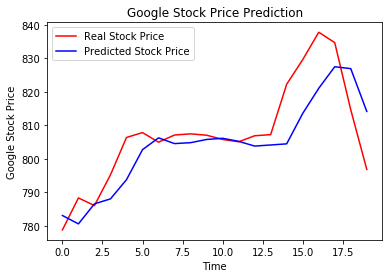

In [17]:
plt.plot(real_data,color='red',label='Real Stock Price')
plt.plot(pred,color='blue',label='Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()